# ICCMA analysis

## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# status define function Consistent with 2017,2019, 2021
def function(s,t):
    if 0<=s<=1 and t<600:
        return 'completed'
    elif s == 0:
        if t < 600:
            return 'out of memory'
        elif t >= 600:
            return 'timeout'
    elif s == -5 and t < 600:
            return 'incorrect solution'
    else:
        return 'crashed'

In [3]:
# status define function Consistent with 2017,2019, 2021
def function_2015(j,c):
    if j == 'correct' and 0 < c <= 600:
        return 'completed'
    elif j == 'incorrect' and 0 < c <= 600:
            return 'incorrect solution'
    else:
        return 'timeout or crashed'

## 2015 Classical Track

### CO Track

In [4]:
df_2015_all = pd.read_csv('C:/Users/DELL/ICCMA/data/2015_all.csv')

In [5]:
df_2015_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62592 entries, 0 to 62591
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       62592 non-null  int64 
 1   solver     62592 non-null  object
 2   track      62592 non-null  object
 3   instances  62592 non-null  object
 4   judgment   62592 non-null  object
 5   cpu-time   62592 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.9+ MB


In [6]:
df_2015_all.solver.unique()

array(['12-ASGL', '11-GRIS', '03-ArgTools', '16-Carneades', '08-CoQuiAAS',
       '02-ArgSemSAT', '15-DIAMOND', '01-LabSATSolver', '09-ASPARTIX-D',
       '04-Cegartix', '06-ZJU-ARG.sh', '17-prefMaxSAT', '05-Dungell',
       '07-ASPARTIX-V', '10-ConArg', '18-ASSA.sh', '14-ProGraph',
       '13-LamatzSolver.sh'], dtype=object)

In [7]:
df_2015_all.track.unique()

array(['DC-GR', 'EE-PR', 'DC-ST', 'DC-PR', 'SE-CO', 'DC-CO', 'EE-GR',
       'SE-GR', 'EE-CO', 'DS-PR', 'DS-ST', 'SE-ST', 'DS-GR', 'EE-ST',
       'SE-PR', 'DS-CO'], dtype=object)

In [8]:
df_2015_all['cpu-time'] = df_2015_all['cpu-time']/1000

In [9]:
df_2015_CO = df_2015_all.loc[df_2015_all['track'].str.contains('CO')]

In [10]:
df_2015_CO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14208 entries, 2448 to 62591
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       14208 non-null  int64  
 1   solver     14208 non-null  object 
 2   track      14208 non-null  object 
 3   instances  14208 non-null  object 
 4   judgment   14208 non-null  object 
 5   cpu-time   14208 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 777.0+ KB


In [11]:
df_2015_CO.head()

,year,solver,track,instances,judgment,cpu-time
2448,2015,05-Dungell,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001
2449,2015,12-ASGL,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.370
2450,2015,03-ArgTools,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,1.380
2451,2015,16-Carneades,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001
2452,2015,08-CoQuiAAS,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.040


In [12]:
df_2015_CO['status'] = df_2015_CO.apply(lambda x: function_2015(x['judgment'], x['cpu-time']), axis = 1)

<ipython-input-12-2e82ecb6b3f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_CO['status'] = df_2015_CO.apply(lambda x: function_2015(x['judgment'], x['cpu-time']), axis = 1)


In [13]:
df_2015_CO.head()

,year,solver,track,instances,judgment,cpu-time,status
2448,2015,05-Dungell,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed
2449,2015,12-ASGL,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.370,completed
2450,2015,03-ArgTools,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,1.380,completed
2451,2015,16-Carneades,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed
2452,2015,08-CoQuiAAS,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.040,completed


In [14]:
def function_score(s):
    if s =='completed':
        return 1
    elif s =='incorrect solution':
        return -5
    else:
        return 0

In [15]:
df_2015_CO['score'] = df_2015_CO.apply(lambda x: function_score(x['status']), axis = 1)

<ipython-input-15-f8016b49ba52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_CO['score'] = df_2015_CO.apply(lambda x: function_score(x['status']), axis = 1)


In [16]:
df_2015_CO.head()

,year,solver,track,instances,judgment,cpu-time,status,score
2448,2015,05-Dungell,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed,0
2449,2015,12-ASGL,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.370,completed,1
2450,2015,03-ArgTools,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,1.380,completed,1
2451,2015,16-Carneades,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed,0
2452,2015,08-CoQuiAAS,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.040,completed,1


In [17]:
df_2015_CO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14208 entries, 2448 to 62591
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       14208 non-null  int64  
 1   solver     14208 non-null  object 
 2   track      14208 non-null  object 
 3   instances  14208 non-null  object 
 4   judgment   14208 non-null  object 
 5   cpu-time   14208 non-null  float64
 6   status     14208 non-null  object 
 7   score      14208 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 999.0+ KB


In [18]:
df_2015_CO.groupby(['track','status']).count()

year  solver  instances  judgment  cpu-time  score
track status                                                                
DC-CO completed           4239    4239       4239      4239      4239   4239
      incorrect solution     5       5          5         5         5      5
      timeout or crashed   940     940        940       940       940    940
DS-CO completed           4269    4269       4269      4269      4269   4269
      incorrect solution     5       5          5         5         5      5
      timeout or crashed   910     910        910       910       910    910
EE-CO completed           1285    1285       1285      1285      1285   1285
      incorrect solution    40      40         40        40        40     40
      timeout or crashed   595     595        595       595       595    595
SE-CO completed           1517    1517       1517      1517      1517   1517
      incorrect solution    28      28         28        28        28     28
      timeout or crashed   375     375        375       375       375    375

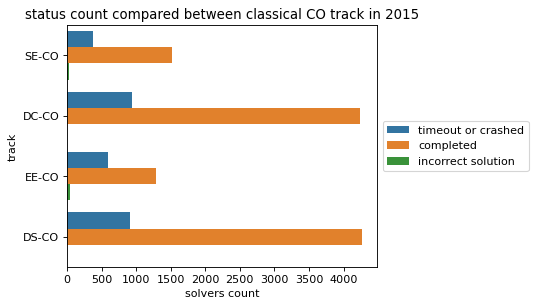

In [19]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2015_CO,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical CO track in 2015')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
df_2015_CO.groupby(['track','judgment'])['solver'].count()

track  judgment 
DC-CO  correct      4448
       incorrect     736
DS-CO  correct      4558
       incorrect     626
EE-CO  correct      1300
       incorrect     620
SE-CO  correct      1602
       incorrect     318
Name: solver, dtype: int64

In [21]:
df_2015_CO_correct = df_2015_CO[df_2015_CO['score'] == 1]

In [22]:
df_2015_CO_correct.loc[df_2015_CO_correct['track'] == 'EE-CO']['cpu-time'].mean()

26.719937743190698

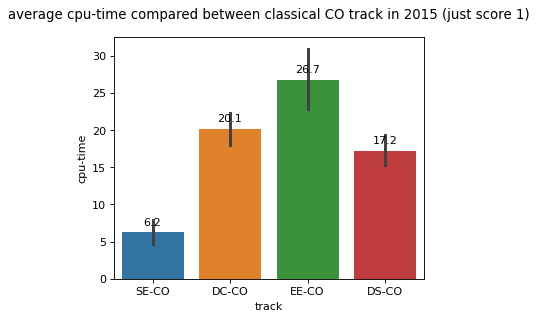

In [23]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
ax = sns.barplot(x='track', y='cpu-time', data=df_2015_CO_correct )
plt.title('average cpu-time compared between classical CO track in 2015 (just score 1)', y=1.05, fontsize = 12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Text(0.5, 1.0, 'all solvers')

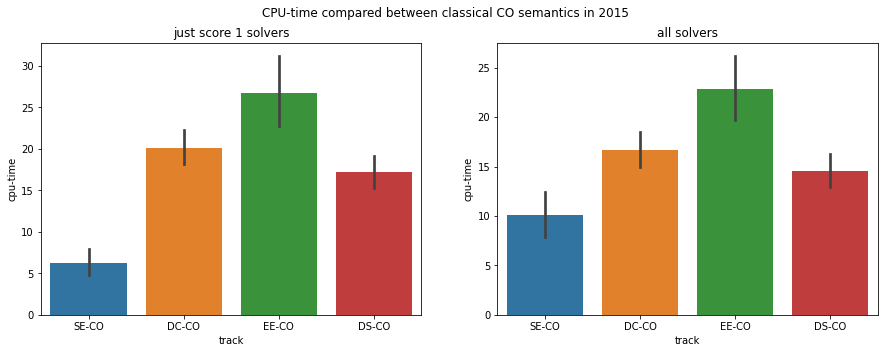

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical CO semantics in 2015')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2015_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2015_CO)
axes[1].set_title('all solvers')

### PR Track

In [25]:
df_2015_PR = df_2015_all.loc[df_2015_all['track'].str.contains('PR')]

In [26]:
df_2015_PR_correct = df_2015_PR[df_2015_PR['judgment'] == 'correct']

In [27]:
df_2015_PR['status'] = df_2015_PR.apply(lambda x: function_2015(x['judgment'], x['cpu-time']), axis = 1)

<ipython-input-27-f1a2e9e041c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_PR['status'] = df_2015_PR.apply(lambda x: function_2015(x['judgment'], x['cpu-time']), axis = 1)


In [28]:
df_2015_PR['score'] = df_2015_PR.apply(lambda x: function_score(x['status']), axis = 1)

<ipython-input-28-a345c7df6faf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_PR['score'] = df_2015_PR.apply(lambda x: function_score(x['status']), axis = 1)


In [29]:
df_2015_PR.head()

,year,solver,track,instances,judgment,cpu-time,status,score
648,2015,04-Cegartix,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.94,completed,1
649,2015,11-GRIS,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,7.86,completed,1
650,2015,08-CoQuiAAS,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.03,completed,1
651,2015,02-ArgSemSAT,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.96,completed,1
652,2015,06-ZJU-ARG.sh,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,1.98,completed,1


In [30]:
df_2015_PR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16896 entries, 648 to 61943
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       16896 non-null  int64  
 1   solver     16896 non-null  object 
 2   track      16896 non-null  object 
 3   instances  16896 non-null  object 
 4   judgment   16896 non-null  object 
 5   cpu-time   16896 non-null  float64
 6   status     16896 non-null  object 
 7   score      16896 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [31]:
df_2015_PR_correct.loc[df_2015_PR_correct['track'] == 'DS-PR']['cpu-time'].mean()

42.54387163953031

In [32]:
df_2015_PR.groupby(['track','status']).count()

year  solver  instances  judgment  cpu-time  score
track status                                                                
DC-PR completed           4060    4060       4060      4060      4060   4060
      incorrect solution    58      58         58        58        58     58
      timeout or crashed  1066    1066       1066      1066      1066   1066
DS-PR completed           5155    5155       5155      5155      5155   5155
      incorrect solution    57      57         57        57        57     57
      timeout or crashed  1124    1124       1124      1124      1124   1124
EE-PR completed           1865    1865       1865      1865      1865   1865
      incorrect solution   264     264        264       264       264    264
      timeout or crashed   751     751        751       751       751    751
SE-PR completed           1665    1665       1665      1665      1665   1665
      incorrect solution   239     239        239       239       239    239
      timeout or crashed   592     592        592       592       592    592

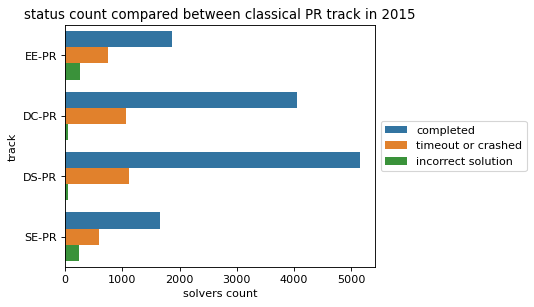

In [33]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2015_PR,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical PR track in 2015')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 1.05, 'cpu-time compared between classical PR track in 2015')

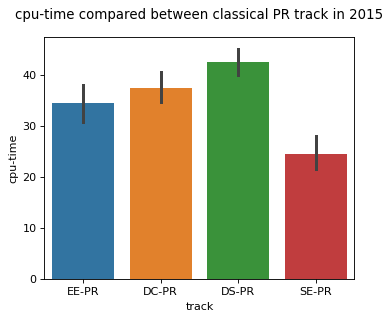

In [34]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
ax = sns.barplot(x='track', y='cpu-time', data=df_2015_PR_correct, )
plt.title('cpu-time compared between classical PR track in 2015', y=1.05, fontsize = 12)

In [35]:
df_2015_PR.groupby(['track','judgment'])['solver'].count()

track  judgment 
DC-PR  correct      4256
       incorrect     928
DS-PR  correct      5282
       incorrect    1054
EE-PR  correct      1888
       incorrect     992
SE-PR  correct      1709
       incorrect     787
Name: solver, dtype: int64

In [36]:
df_2015_PR_correct = df_2015_PR.loc[df_2015_PR['score'] ==1]

Text(0.5, 1.0, 'all solvers')

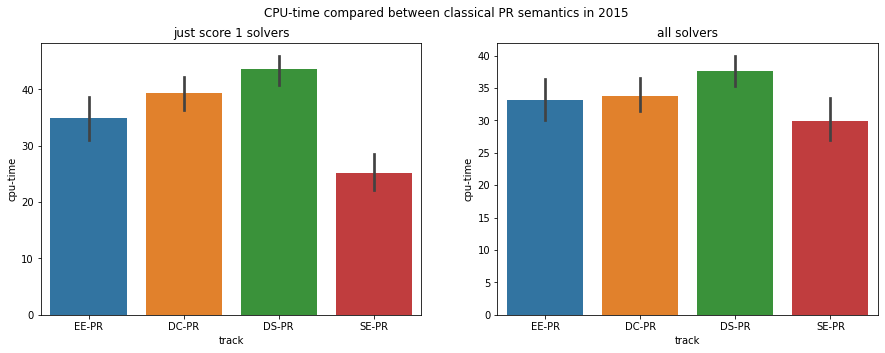

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical PR semantics in 2015')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2015_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2015_PR)
axes[1].set_title('all solvers')

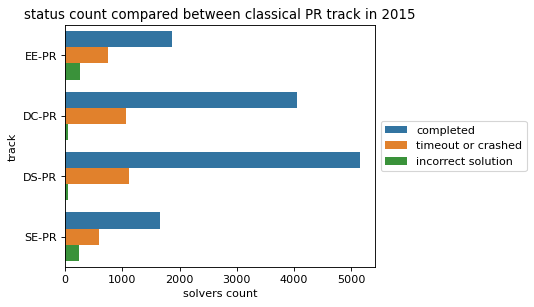

In [38]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2015_PR,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical PR track in 2015')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

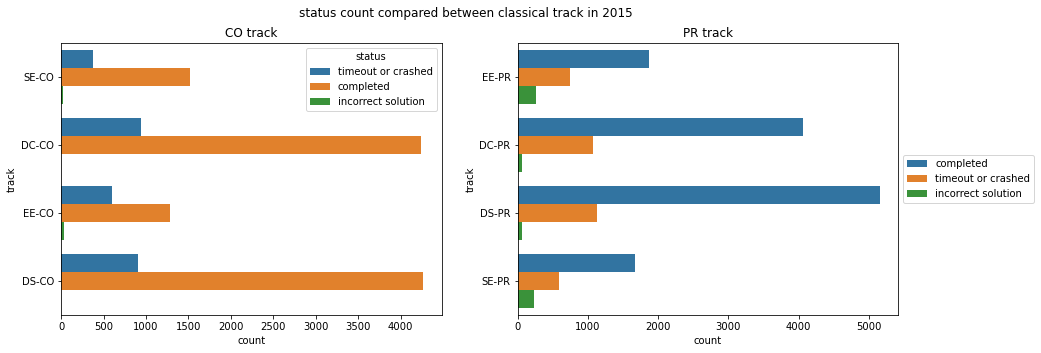

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('status count compared between classical track in 2015')

sns.countplot(ax=axes[0], data=df_2015_CO, y='track', hue='status')
axes[0].set_title('CO track')

sns.countplot(ax=axes[1], data=df_2015_PR, y='track', hue='status')
axes[1].set_title('PR track')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 2017 Classical Track

### CO Track

In [40]:
df_2017_CO = pd.read_csv('C:/Users/DELL/ICCMA/data/2017-CO.csv')

In [41]:
df_2017_CO['solver'].unique()

array(['argmat-clpb', 'argmat-dvisat', 'argmat-mpg', 'argmat-sat',
       'ArgSemSAT', 'ArgTools', 'cegartix', 'conarg', 'CoQuiAAS',
       'EqArgSolver', 'gg-sts', 'goDIAMOND', 'heureka', 'pyglaf'],
      dtype=object)

In [42]:
df_2017_CO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       19600 non-null  int64  
 1   solver     19600 non-null  object 
 2   track      19600 non-null  object 
 3   instances  19600 non-null  object 
 4   answer     9800 non-null   object 
 5   cpu-time   19600 non-null  float64
 6   score      19600 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.0+ MB


Usolved problem

In [43]:
df_2017_CO_un = df_2017_CO[df_2017_CO['score']==0]
df_2017_CO_un.head()
df_2017_CO_un.groupby('instances')['solver'].count().nlargest(10)

instances
C/4/admbuster_2500000.tgf    34
B/5/ER_400_20_4.tgf          26
B/5/ER_400_20_7.tgf          26
B/5/ER_500_10_1.tgf          26
B/5/ER_500_10_2.tgf          26
B/5/ER_500_10_5.tgf          26
B/5/ER_500_20_4.tgf          26
B/5/WS_400_24_70_10.tgf      26
B/5/WS_400_24_90_10.tgf      26
B/5/WS_400_32_90_10.tgf      26
Name: solver, dtype: int64

In [44]:
df_2017_CO.describe()

,year,cpu-time,score
count,19600.0,19600.000000,19600.000000
mean,2017.0,336.026403,0.575714
std,0.0,647.798861,0.933736
min,2017.0,0.000000,-5.000000
25%,2017.0,0.020000,0.000000
50%,2017.0,3.395000,1.000000
75%,2017.0,124.647500,1.000000
max,2017.0,3270.150000,1.000000


- status distribution
    - if 0<=score<=1 and time<600 then status = completed
    - if score = 0 and time >= 600 thenstatus = timeout
    - if score == -5 and time <600 then status = incorrect solution
    - if socre == 0 and time <600 then status = out of memory
    - else: crashed

In [45]:
df_2017_CO['status'] = None

In [46]:
df_2017_CO['status'] = df_2017_CO.apply(lambda x: function(x['score'], x['cpu-time']), axis = 1)

In [47]:
df_2017_CO.head()

,year,solver,track,instances,answer,cpu-time,score,status
0,2017,argmat-clpb,DS-CO,C/2/ER_300_10_6.tgf,none,1199.98,0,timeout
1,2017,argmat-clpb,DS-CO,C/2/ER_300_20_7.tgf,none,1201.00,0,timeout
2,2017,argmat-clpb,DS-CO,C/2/ER_400_20_8.tgf,none,1200.85,0,timeout
3,2017,argmat-clpb,DS-CO,C/2/ER_500_100_2.tgf,none,1200.76,0,timeout
4,2017,argmat-clpb,DS-CO,C/2/ER_500_20_4.tgf,none,1200.71,0,timeout


In [48]:
df_2017_CO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       19600 non-null  int64  
 1   solver     19600 non-null  object 
 2   track      19600 non-null  object 
 3   instances  19600 non-null  object 
 4   answer     9800 non-null   object 
 5   cpu-time   19600 non-null  float64
 6   score      19600 non-null  int64  
 7   status     19600 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [49]:
df_2017_CO_correct = df_2017_CO.loc[df_2017_CO['score']==1]

In [50]:
df_2017_CO_correct.loc[df_2017_CO_correct['track'] == 'EE-CO']['cpu-time'].mean()

58.35088247595151

Text(0.5, 1.05, 'cpu-time compared between classical CO track in 2017')

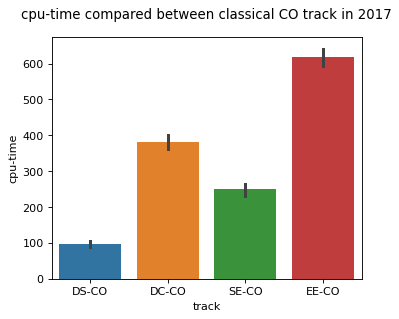

In [51]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
ax = sns.barplot(x='track', y='cpu-time', data=df_2017_CO)
plt.title('cpu-time compared between classical CO track in 2017', y=1.05, fontsize = 12)

Text(0.5, 1.0, 'all solvers')

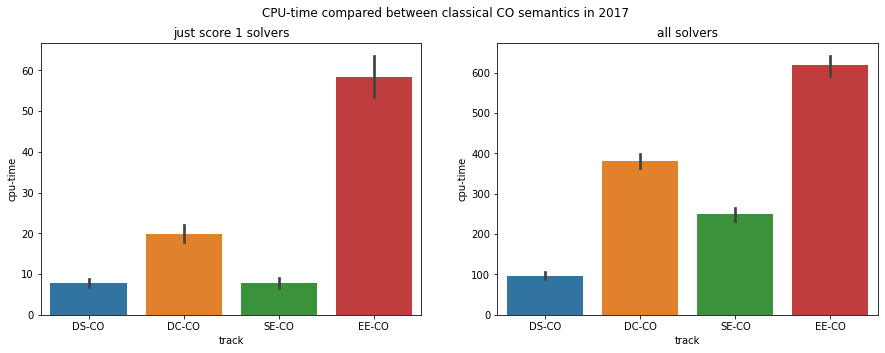

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical CO semantics in 2017')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2017_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2017_CO)
axes[1].set_title('all solvers')

In [53]:
df_2017_CO.groupby(['track','status']).count()

year  solver  instances  answer  cpu-time  score
track status                                                              
DC-CO completed           3532    3532       3532    3532      3532   3532
      incorrect solution   206     206        206     206       206    206
      timeout             1162    1162       1162    1162      1162   1162
DS-CO completed           4532    4532       4532    4532      4532   4532
      incorrect solution    15      15         15      15        15     15
      timeout              353     353        353     353       353    353
EE-CO completed           3151    3151       3151       0      3151   3151
      incorrect solution    91      91         91       0        91     91
      timeout             1658    1658       1658       0      1658   1658
SE-CO completed           4125    4125       4125       0      4125   4125
      incorrect solution    98      98         98       0        98     98
      timeout              677     677        677       0       677    677

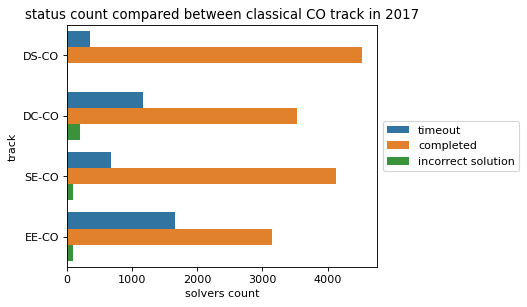

In [54]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2017_CO,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical CO track in 2017')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### PR Track

In [55]:
df_2017_PR = pd.read_csv('C:/Users/DELL/ICCMA/data/2017-PR.csv')

In [56]:
df_2017_PR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       18900 non-null  int64  
 1   solver     18900 non-null  object 
 2   track      18900 non-null  object 
 3   instances  18900 non-null  object 
 4   answer     9100 non-null   object 
 5   cpu-time   18900 non-null  float64
 6   score      18899 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.0+ MB


In [57]:
df_2017_PR.describe()

,year,cpu-time,score
count,18900.0,18900.000000,18899.000000
mean,2017.0,365.322334,0.465051
std,0.0,610.384354,1.138649
min,2017.0,0.000000,-5.000000
25%,2017.0,0.130000,0.000000
50%,2017.0,11.995000,1.000000
75%,2017.0,445.360000,1.000000
max,2017.0,2837.460000,1.000000


- status distribution
    - if 0<=score<=1 and time<600 then status = completed
    - if score = 0 and time >= 600 then status = timeout
    - if score == -5 and time <600 then status = incorrect solution
    - if socre == 0 and time <600 then status = out of memory
    - else: crashed

In [58]:
df_2017_PR['status'] = None

In [59]:
df_2017_PR['status'] = df_2017_PR.apply(lambda x: function(x['score'], x['cpu-time']), axis = 1)

In [60]:
df_2017_PR.head()

,year,solver,track,instances,answer,cpu-time,score,status
0,2017,argmat-dvisat,DS-PR,A/2/BA_160_20_3.apx,yes,0.00,1.0,completed
1,2017,argmat-dvisat,DS-PR,A/2/BA_180_20_1.apx,yes,0.00,1.0,completed
2,2017,argmat-dvisat,DS-PR,A/2/BA_200_30_2.apx,yes,0.00,1.0,completed
3,2017,argmat-dvisat,DS-PR,A/2/BA_60_60_3.apx,no,2.38,1.0,completed
4,2017,argmat-dvisat,DS-PR,A/2/BA_80_50_1.apx,no,0.00,1.0,completed


Text(0.5, 1.05, 'cpu-time compared between classical PR track in 2017')

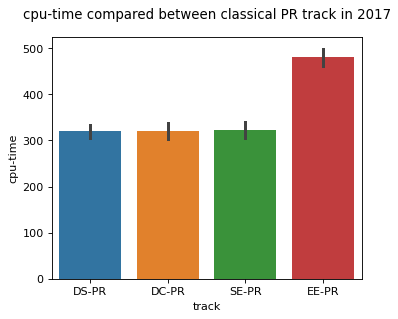

In [61]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
ax = sns.barplot(x='track', y='cpu-time', data=df_2017_PR)
plt.title('cpu-time compared between classical PR track in 2017', y=1.05, fontsize = 12)

In [62]:
df_2017_PR_correct = df_2017_PR.loc[df_2017_PR['score']==1]

Text(0.5, 1.0, 'all solvers')

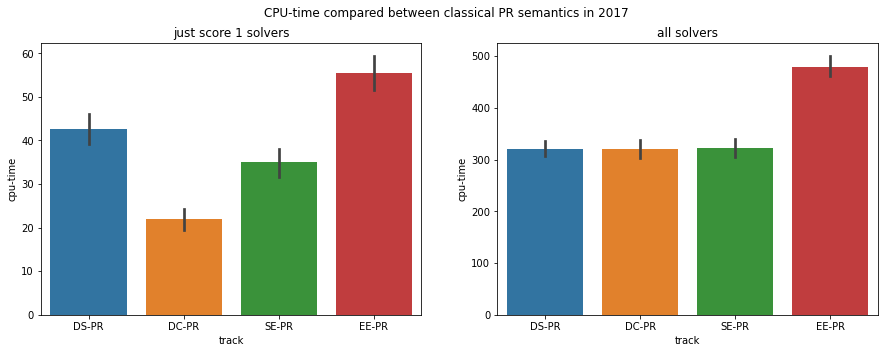

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical PR semantics in 2017')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2017_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2017_PR)
axes[1].set_title('all solvers')

In [64]:
df_2017_PR.groupby(['track','status']).count()

year  solver  instances  answer  cpu-time  score
track status                                                              
DC-PR completed           3457    3457       3457    3457      3457   3457
      crashed                1       1          1       1         1      0
      incorrect solution   161     161        161     161       161    161
      timeout              931     931        931     931       931    931
DS-PR completed           3355    3355       3355    3355      3355   3355
      incorrect solution    42      42         42      42        42     42
      timeout             1153    1153       1153    1153      1153   1153
EE-PR completed           3569    3569       3569       0      3569   3569
      incorrect solution   238     238        238       0       238    238
      timeout             1443    1443       1443       0      1443   1443
SE-PR completed           3442    3442       3442       0      3442   3442
      crashed                7       7          7       0         7      7
      incorrect solution   212     212        212       0       212    212
      timeout              889     889        889       0       889    889

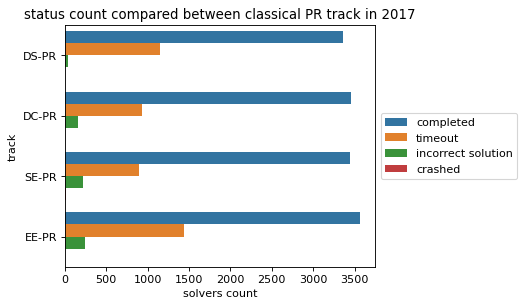

In [65]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2017_PR,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical PR track in 2017')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

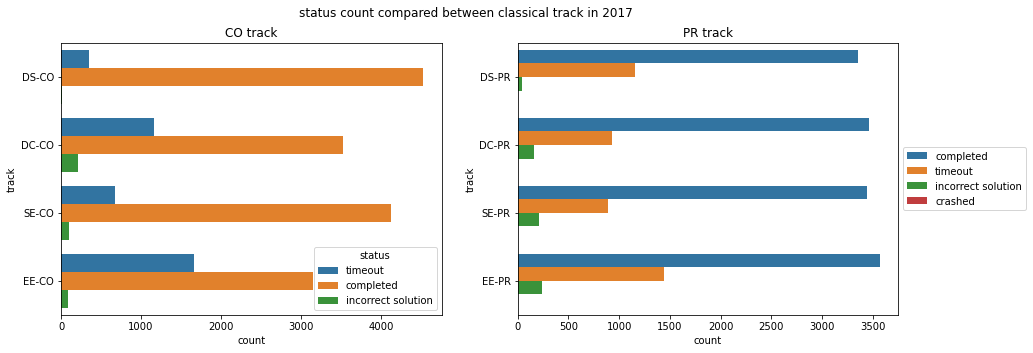

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('status count compared between classical track in 2017')

sns.countplot(ax=axes[0], data=df_2017_CO, y='track', hue='status')
axes[0].set_title('CO track')

sns.countplot(ax=axes[1], data=df_2017_PR, y='track', hue='status')
axes[1].set_title('PR track')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 2019 Classical Track

### CO Track

In [67]:
df_2019_CO = pd.read_csv('C:/Users/DELL/ICCMA/data/2019-CO.csv')

In [68]:
df_2019_CO.status.unique()

array(['COMPLETED', 'TIMEOUT', 'incorrect-solution', 'crashed',
       'OUT_OF_MEMORY'], dtype=object)

In [69]:
df_2019_CO.score.unique()

array([ 1,  0, -5], dtype=int64)

In [70]:
df_2019_CO.describe()

,year,cpu-time,memory,score
count,10106.0,10106.000000,1.010600e+04,10106.000000
mean,2019.0,44.300540,8.925755e+08,0.811300
std,0.0,149.951781,1.088751e+10,0.869356
min,2019.0,0.230000,2.875392e+06,-5.000000
25%,2019.0,0.311000,2.883584e+06,1.000000
50%,2019.0,0.483000,2.887680e+06,1.000000
75%,2019.0,4.075250,2.891776e+06,1.000000
max,2019.0,663.142000,4.760000e+11,1.000000


In [71]:
df_2019_CO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10106 entries, 0 to 10105
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       10106 non-null  int64  
 1   solver     10106 non-null  object 
 2   instances  10106 non-null  object 
 3   track      10106 non-null  object 
 4   cpu-time   10106 non-null  float64
 5   memory     10106 non-null  float64
 6   status     10106 non-null  object 
 7   score      10106 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 631.8+ KB


In [72]:
df_2019_CO.groupby(['track','status']).count()

year  solver  instances  cpu-time  memory  score
track status                                                              
DC-CO COMPLETED           2431    2431       2431      2431    2431   2431
      OUT_OF_MEMORY         11      11         11        11      11     11
      TIMEOUT              115     115        115       115     115    115
      crashed                1       1          1         1       1      1
      incorrect-solution    50      50         50        50      50     50
DS-CO COMPLETED           2570    2570       2570      2570    2570   2570
      TIMEOUT               33      33         33        33      33     33
      incorrect-solution     5       5          5         5       5      5
EE-CO COMPLETED           2117    2117       2117      2117    2117   2117
      OUT_OF_MEMORY          7       7          7         7       7      7
      TIMEOUT              146     146        146       146     146    146
      crashed                9       9          9         9       9      9
      incorrect-solution     3       3          3         3       3      3
SE-CO COMPLETED           2427    2427       2427      2427    2427   2427
      TIMEOUT               36      36         36        36      36     36
      incorrect-solution   145     145        145       145     145    145

In [73]:
df_2019_CO.groupby('track')['cpu-time'].sum()

track
DC-CO     97441.606
DS-CO     34676.877
EE-CO    278745.346
SE-CO     36837.429
Name: cpu-time, dtype: float64

In [74]:
df_2019_CO.head()

,year,solver,instances,track,cpu-time,memory,status,score
0,2019,aspartix19,A-1-admbuster_1000.tgf,SE-CO,0.469,2904064.0,COMPLETED,1
1,2019,aspartix19,A-1-admbuster_2000.tgf,SE-CO,0.399,2908160.0,COMPLETED,1
2,2019,aspartix19,A-1-admbuster_4000.tgf,SE-CO,0.465,2912256.0,COMPLETED,1
3,2019,aspartix19,A-1-admbuster_6000.tgf,SE-CO,0.530,2912256.0,COMPLETED,1
4,2019,aspartix19,A-1-afinput_exp_acyclic_depvary_step3_batch_yy...,SE-CO,0.375,2908160.0,COMPLETED,1


In [76]:
df_2019_CO_correct = df_2019_CO.loc[df_2019_CO['score']==1]

In [77]:
df_2019_CO_correct.groupby('track')['cpu-time'].mean()

track
DC-CO     8.406799
DS-CO     5.033449
EE-CO    37.153333
SE-CO     5.385802
Name: cpu-time, dtype: float64

Text(0.5, 1.0, 'all solvers')

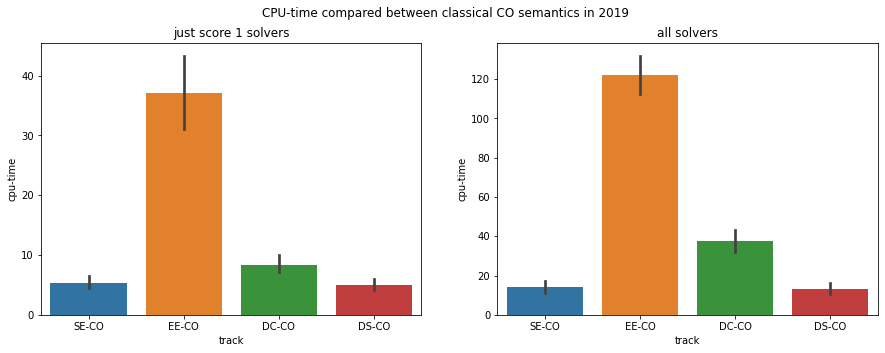

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical CO semantics in 2019')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2019_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2019_CO)
axes[1].set_title('all solvers')

Text(0.5, 1.0, 'all solvers')

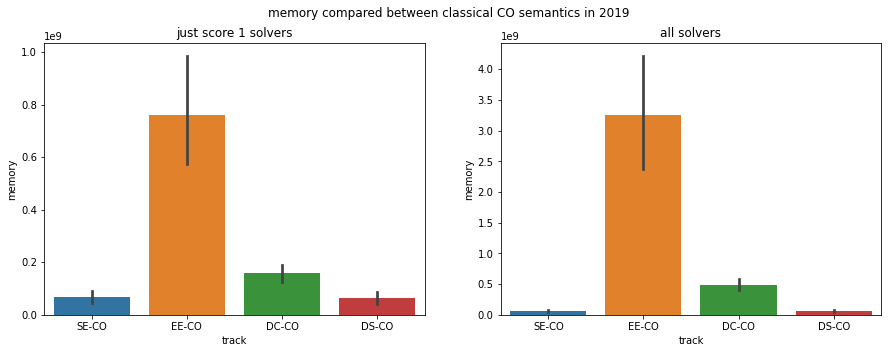

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('memory compared between classical CO semantics in 2019')

sns.barplot(ax=axes[0], x='track', y='memory', data=df_2019_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='memory', data=df_2019_CO)
axes[1].set_title('all solvers')

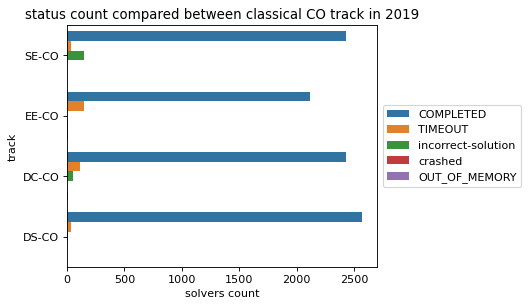

In [82]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
ax = sns.countplot(data=df_2019_CO,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical CO track in 2019')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### PR Track

In [83]:
df_2019_PR = pd.read_csv('C:/Users/DELL/ICCMA/data/2019-PR.csv')

In [84]:
df_2019_PR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9128 entries, 0 to 9127
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       9128 non-null   int64  
 1   solver     9128 non-null   object 
 2   instances  9128 non-null   object 
 3   track      9128 non-null   object 
 4   cpu-time   9128 non-null   float64
 5   memory     9128 non-null   float64
 6   status     9128 non-null   object 
 7   score      9128 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 570.6+ KB


In [85]:
df_2019_PR.head()

,year,solver,instances,track,cpu-time,memory,status,score
0,2019,aspartix19,A-1-admbuster_1000.tgf,SE-PR,0.491,2904064.0,COMPLETED,1
1,2019,aspartix19,A-1-admbuster_2000.tgf,SE-PR,0.554,2899968.0,COMPLETED,1
2,2019,aspartix19,A-1-admbuster_4000.tgf,SE-PR,0.578,2904064.0,COMPLETED,1
3,2019,aspartix19,A-1-admbuster_6000.tgf,SE-PR,0.727,2908160.0,COMPLETED,1
4,2019,aspartix19,A-1-afinput_exp_acyclic_depvary_step3_batch_yy...,SE-PR,0.382,2912256.0,COMPLETED,1


In [86]:
df_2019_PR.describe()

,year,cpu-time,memory,score
count,9128.0,9128.000000,9.128000e+03,9128.000000
mean,2019.0,68.160511,1.910355e+09,0.706398
std,0.0,183.631907,1.844922e+10,1.075803
min,2019.0,0.219000,2.875392e+06,-5.000000
25%,2019.0,0.330000,2.883584e+06,1.000000
50%,2019.0,0.644000,2.887680e+06,1.000000
75%,2019.0,6.878500,2.908160e+06,1.000000
max,2019.0,665.137000,4.760000e+11,1.000000


In [87]:
df_2019_PR.groupby('track')['cpu-time'].mean()

track
DC-PR     39.540853
DS-PR     34.753486
EE-PR    121.722031
SE-PR     76.625674
Name: cpu-time, dtype: float64

In [88]:
df_2019_PR_correct = df_2019_PR.loc[df_2019_PR['score']==1]

In [89]:
df_2019_PR_correct.groupby('track')['memory'].describe()

,count,mean,std,min,25%,50%,75%,max
track,,,,,,,,
DC-PR,2094.0,1.523732e+08,7.740071e+08,2875392.0,2883584.0,2887680.0,2891776.0,9.459491e+09
DS-PR,2077.0,5.714107e+07,5.327237e+08,2875392.0,2883584.0,2887680.0,2891776.0,1.038751e+10
EE-PR,1810.0,7.909189e+08,4.426115e+09,2875392.0,2883584.0,2887680.0,2904064.0,6.911248e+10
SE-PR,1912.0,1.730773e+09,1.752243e+10,2875392.0,2883584.0,2887680.0,2904064.0,3.570000e+11


Text(0.5, 1.0, 'all solvers')

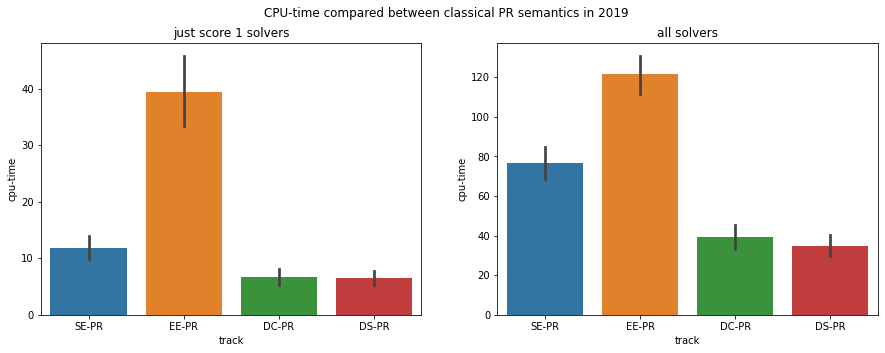

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical PR semantics in 2019')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2019_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2019_PR)
axes[1].set_title('all solvers')

Text(0.5, 1.0, 'all solvers')

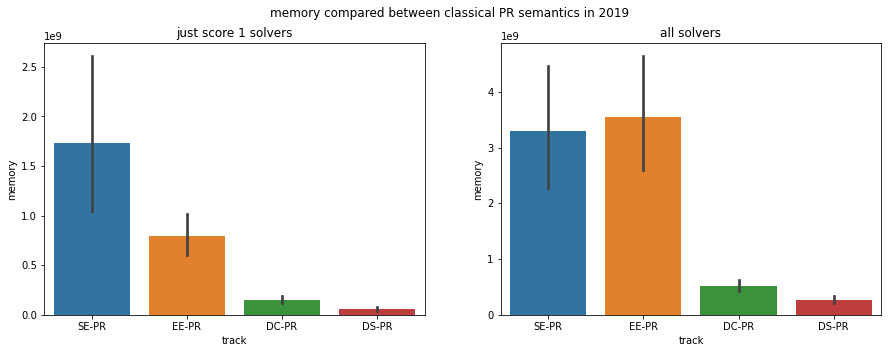

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('memory compared between classical PR semantics in 2019')

sns.barplot(ax=axes[0], x='track', y='memory', data=df_2019_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='memory', data=df_2019_PR)
axes[1].set_title('all solvers')

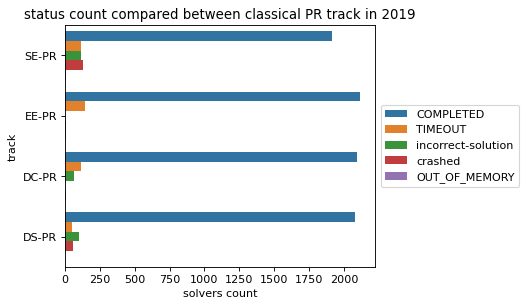

In [92]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2019_PR,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical PR track in 2019')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

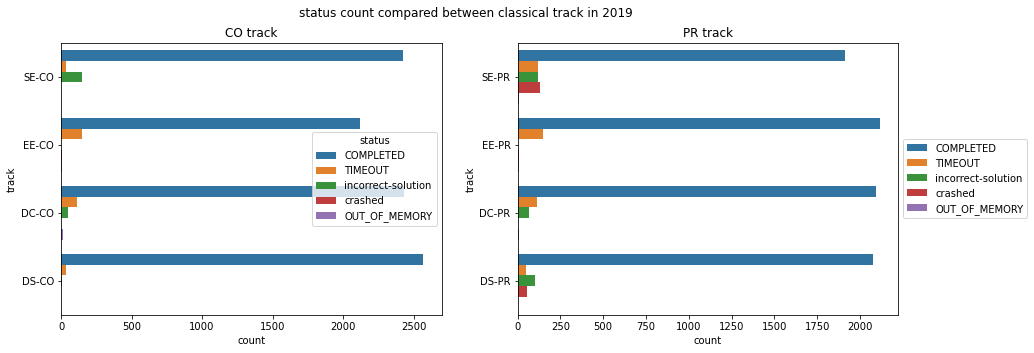

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('status count compared between classical track in 2019')

sns.countplot(ax=axes[0], data=df_2019_CO, y='track', hue='status')
axes[0].set_title('CO track')

sns.countplot(ax=axes[1], data=df_2019_PR, y='track', hue='status')
axes[1].set_title('PR track')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 2021 Classical Track

In [94]:
df_2021_all = pd.read_csv('C:/Users/DELL/ICCMA/data/ICCMA_2021_exact_track.csv')

In [95]:
df_2021_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81593 entries, 0 to 81592
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       81593 non-null  int64  
 1   solver     81593 non-null  object 
 2   instances  81593 non-null  object 
 3   track      81593 non-null  object 
 4   cpu-time   81593 non-null  float64
 5   memory     81593 non-null  int64  
 6   status     81593 non-null  object 
 7   score      81593 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.0+ MB


In [96]:
df_2021_all.head()

,year,solver,instances,track,cpu-time,memory,status,score
0,2021,ConArg,2021/be_7_3_10,DS-STG,602.341,71723888,TIMEOUT,0
1,2021,ConArg,2021/be_8_5_10,DS-STG,602.268,64331108,TIMEOUT,0
2,2021,ConArg,2021/e_5_6_8,DS-STG,602.233,64897592,TIMEOUT,0
3,2021,ConArg,2021/be_8_6_6,DS-STG,605.152,61158420,TIMEOUT,0
4,2021,ConArg,2021/be_8_2_6,DS-STG,603.274,71160856,TIMEOUT,0


In [97]:
df_2021_all.status.unique()

array(['TIMEOUT', 'COMPLETED', 'OUT_OF_MEMORY', 'WRONG'], dtype=object)

In [98]:
df_2021_all[df_2021_all['status'] == 'WRONG']

,year,solver,instances,track,cpu-time,memory,status,score
48467,2021,?-TOKSIA,2021/be_10_6_10,DS-ST,378.220,10634764,WRONG,0
50043,2021,?-TOKSIA-parallel,2021/b_9_8_9,DS-ST,326.406,12491108,WRONG,0
50160,2021,?-TOKSIA-parallel,2021/e_10_10_10,DS-ST,428.080,23208660,WRONG,0
50224,2021,?-TOKSIA-parallel,2021/b_9_10_8,DS-ST,376.797,14539444,WRONG,0
73397,2021,?-TOKSIA-parallel,2021/e_10_7_10,DC-ST,382.408,20080760,WRONG,0


In [99]:
dddd = df_2021_all.groupby(['track', 'status']).count()

In [100]:
df_2021_CO = df_2021_all.loc[df_2021_all['track'].str.contains('CO')]

In [101]:
df_2021_PR = df_2021_all.loc[df_2021_all['track'].str.contains('PR')]

### CO Track

In [102]:
#df_2021_CO = df.loc[df['instance'].str.contains('2021')]

In [103]:
df_2021_CO.describe()

,year,cpu-time,memory,score
count,18784.0,18784.000000,1.878400e+04,18784.000000
mean,2021.0,228.572570,1.009916e+07,0.639427
std,0.0,268.714546,1.708835e+07,0.480179
min,2021.0,0.002914,0.000000e+00,0.000000
25%,2021.0,6.404103,5.772080e+05,0.000000
50%,2021.0,45.496350,2.504076e+06,1.000000
75%,2021.0,600.055000,1.045590e+07,1.000000
max,2021.0,622.446000,1.006212e+08,1.000000


In [104]:
df_2021_CO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18784 entries, 13501 to 59873
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       18784 non-null  int64  
 1   solver     18784 non-null  object 
 2   instances  18784 non-null  object 
 3   track      18784 non-null  object 
 4   cpu-time   18784 non-null  float64
 5   memory     18784 non-null  int64  
 6   status     18784 non-null  object 
 7   score      18784 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ MB


In [105]:
df_2021_CO_correct = df_2021_CO.loc[df_2021_CO['score']==1]

In [106]:
df_2021_CO.groupby('track')['cpu-time'].mean()

track
DC-CO    218.363537
DS-CO    155.906450
EE-CO    447.772749
SE-CO     92.247544
Name: cpu-time, dtype: float64

In [107]:
df_2021_CO_correct.groupby('track')['cpu-time'].mean()

track
DC-CO    62.451553
DS-CO    33.445595
EE-CO    26.842040
SE-CO    34.091973
Name: cpu-time, dtype: float64

Text(0.5, 1.0, 'all solvers')

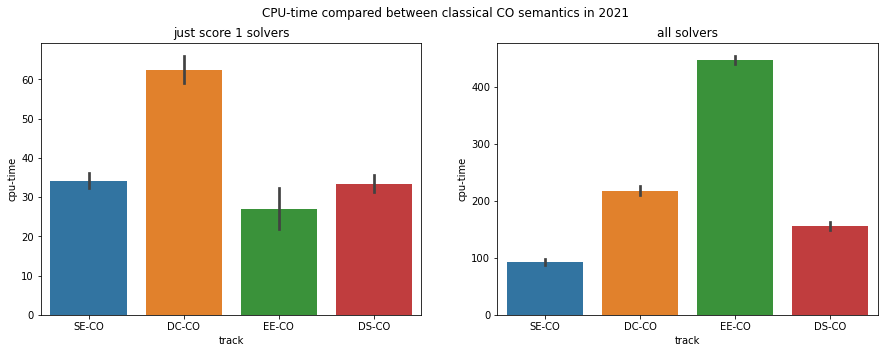

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical CO semantics in 2021')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2021_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2021_CO)
axes[1].set_title('all solvers')

Text(0.5, 1.0, 'all solvers')

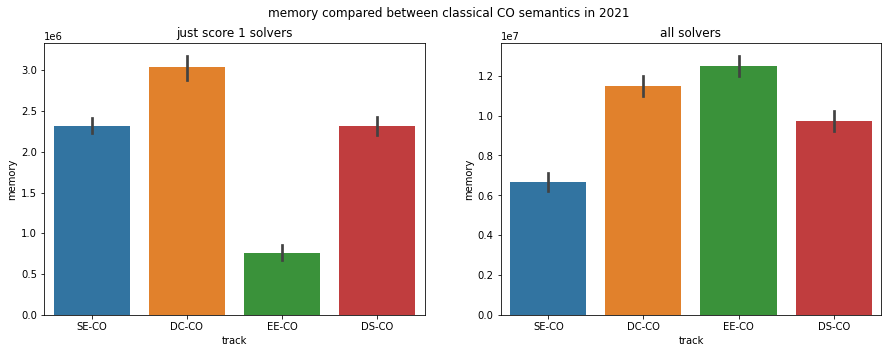

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('memory compared between classical CO semantics in 2021')

sns.barplot(ax=axes[0], x='track', y='memory', data=df_2021_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='memory', data=df_2021_CO)
axes[1].set_title('all solvers')

In [110]:
df_2021_PR.groupby(['track', 'status']).count()

year  solver  instances  cpu-time  memory  score
track status                                                         
DC-PR COMPLETED      2695    2695       2695      2695    2695   2695
      TIMEOUT         827     827        827       827     827    827
DS-PR COMPLETED      1571    1571       1571      1571    1571   1571
      OUT_OF_MEMORY    39      39         39        39      39     39
      TIMEOUT        1912    1912       1912      1912    1912   1912
EE-PR COMPLETED       640     640        640       640     640    640
      OUT_OF_MEMORY    35      35         35        35      35     35
      TIMEOUT        2847    2847       2847      2847    2847   2847
SE-PR COMPLETED      1469    1469       1469      1469    1469   1469
      OUT_OF_MEMORY    25      25         25        25      25     25
      TIMEOUT        2028    2028       2028      2028    2028   2028

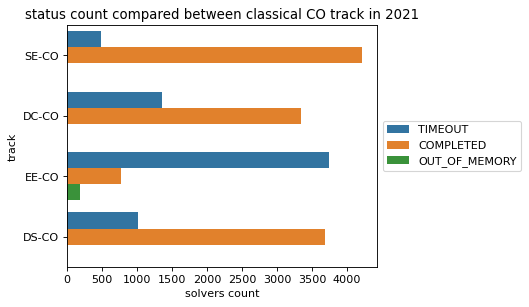

In [111]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2021_CO,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical CO track in 2021')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### PR Track

In [112]:
#df_2021_PR = df.loc[df['instance'].str.contains('2021')]

In [113]:
#df_2021_PR.loc[df_2021_PR['track']=='CE-PR', 'track'] = 'EE-PR'

In [114]:
df_2021_PR.describe()

,year,cpu-time,memory,score
count,14088.0,14088.000000,1.408800e+04,14088.000000
mean,2021.0,331.821716,9.593253e+06,0.452513
std,0.0,265.856325,1.289538e+07,0.497758
min,2021.0,0.004608,0.000000e+00,0.000000
25%,2021.0,35.898825,1.218567e+06,0.000000
50%,2021.0,347.973000,4.362212e+06,0.000000
75%,2021.0,600.146000,1.422362e+07,1.000000
max,2021.0,610.684000,1.007204e+08,1.000000


In [115]:
df_2021_PR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14088 entries, 2935 to 66330
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       14088 non-null  int64  
 1   solver     14088 non-null  object 
 2   instances  14088 non-null  object 
 3   track      14088 non-null  object 
 4   cpu-time   14088 non-null  float64
 5   memory     14088 non-null  int64  
 6   status     14088 non-null  object 
 7   score      14088 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 990.6+ KB


In [116]:
df_2021_PR_correct = df_2021_PR.loc[df_2021_PR['score']==1]

In [117]:
df_2021_PR_correct.groupby('track')['cpu-time'].mean()

track
DC-PR     69.355233
DS-PR     94.216883
EE-PR     24.339029
SE-PR    111.523166
Name: cpu-time, dtype: float64

Text(0.5, 1.0, 'all solvers')

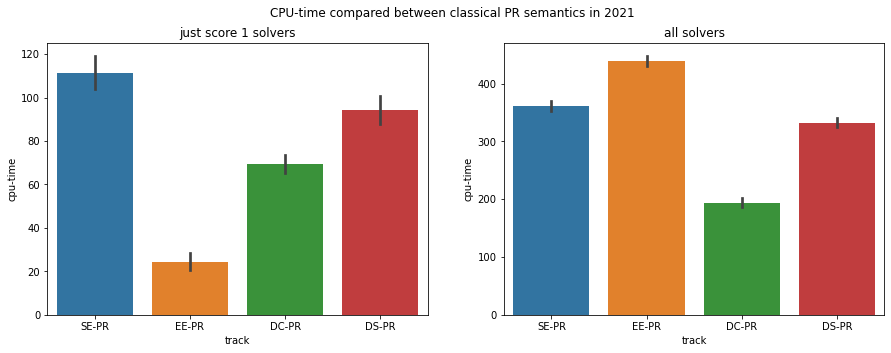

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between classical PR semantics in 2021')

sns.barplot(ax=axes[0], x='track', y='cpu-time', data=df_2021_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='cpu-time', data=df_2021_PR)
axes[1].set_title('all solvers')

Text(0.5, 1.0, 'all solvers')

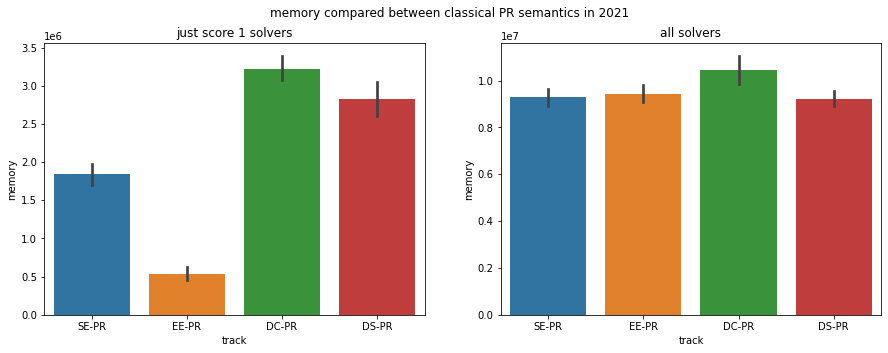

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('memory compared between classical PR semantics in 2021')

sns.barplot(ax=axes[0], x='track', y='memory', data=df_2021_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='track', y='memory', data=df_2021_PR)
axes[1].set_title('all solvers')

Text(0.5, 1.05, 'memory compared between classical PR track in 2021')

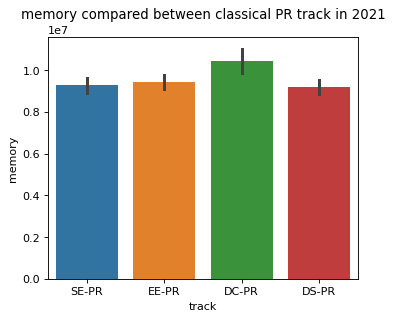

In [120]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
ax = sns.barplot(x='track', y='memory', data=df_2021_PR)
plt.title('memory compared between classical PR track in 2021', y=1.05, fontsize = 12)

In [121]:
df_2021_PR.groupby('status').count()

,year,solver,instances,track,cpu-time,memory,score
status,,,,,,,
COMPLETED,6375,6375,6375,6375,6375,6375,6375
OUT_OF_MEMORY,99,99,99,99,99,99,99
TIMEOUT,7614,7614,7614,7614,7614,7614,7614


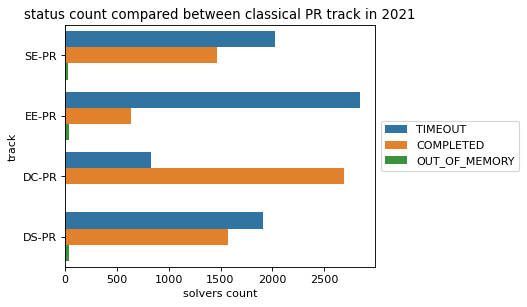

In [122]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=80)
p = sns.countplot(data=df_2021_PR,y='track', hue='status',ax=ax)
plt.xlabel('solvers count')
plt.ylabel('track')
plt.title('status count compared between classical PR track in 2021')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

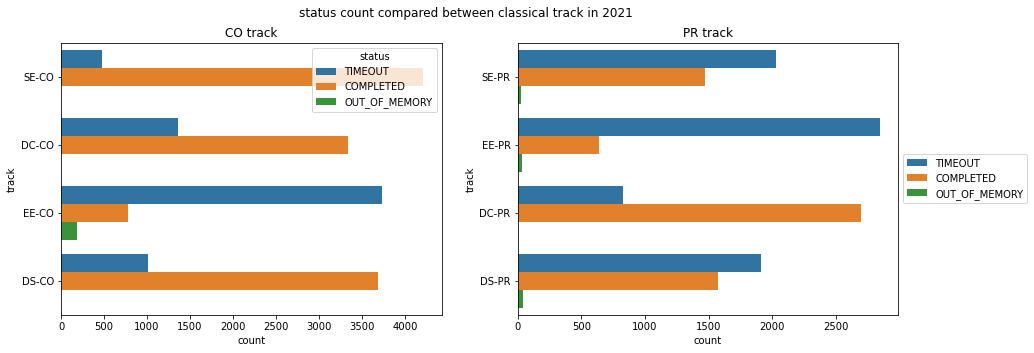

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('status count compared between classical track in 2021')

sns.countplot(ax=axes[0], data=df_2021_CO, y='track', hue='status')
axes[0].set_title('CO track')

sns.countplot(ax=axes[1], data=df_2021_PR, y='track', hue='status')
axes[1].set_title('PR track')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Specific track compared through years

In [124]:
df_2015_CO.track.unique()

array(['SE-CO', 'DC-CO', 'EE-CO', 'DS-CO'], dtype=object)

In [125]:
df_whole_year_CO = pd.concat([df_2015_CO,df_2017_CO,df_2019_CO,df_2021_CO],axis=0,ignore_index=True)

In [126]:
df_memory_year_CO =  pd.concat([df_2019_CO,df_2021_CO],axis=0,ignore_index=True)

In [127]:
df_whole_year_CO_correct = pd.concat([df_2015_CO_correct,df_2017_CO_correct,df_2019_CO_correct,df_2021_CO_correct],axis=0,ignore_index=True)

In [128]:
df_memory_year_CO_correct = pd.concat([df_2019_CO_correct,df_2021_CO_correct],axis=0,ignore_index=True)

Text(0.5, 1.0, 'all solvers')

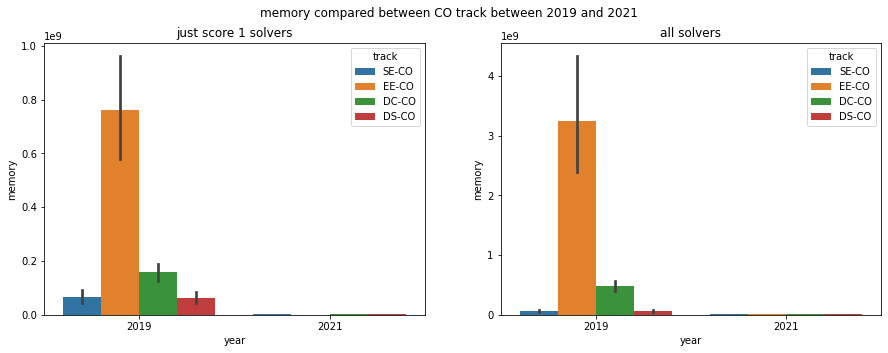

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('memory compared between CO track between 2019 and 2021')

sns.barplot(ax=axes[0], x='year', y='memory', hue='track',data=df_memory_year_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='memory',hue='track', data=df_memory_year_CO)
axes[1].set_title('all solvers')

In [130]:
df_whole_year_CO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62698 entries, 0 to 62697
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       62698 non-null  int64  
 1   solver     62698 non-null  object 
 2   track      62698 non-null  object 
 3   instances  62698 non-null  object 
 4   judgment   14208 non-null  object 
 5   cpu-time   62698 non-null  float64
 6   status     62698 non-null  object 
 7   score      62698 non-null  int64  
 8   answer     9800 non-null   object 
 9   memory     28890 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


In [131]:
df_whole_year_CO.head()

,year,solver,track,instances,judgment,cpu-time,status,score,answer,memory
0,2015,05-Dungell,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed,0,NaN,NaN
1,2015,12-ASGL,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.370,completed,1,NaN,NaN
2,2015,03-ArgTools,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,1.380,completed,1,NaN,NaN
3,2015,16-Carneades,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed,0,NaN,NaN
4,2015,08-CoQuiAAS,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.040,completed,1,NaN,NaN


In [132]:
df_whole_year_CO['track'].unique()

array(['SE-CO', 'DC-CO', 'EE-CO', 'DS-CO'], dtype=object)

In [133]:
df_whole_year_PR = pd.concat([df_2015_PR,df_2017_PR,df_2019_PR,df_2021_PR],axis=0,ignore_index=True)

In [134]:
df_memory_year_PR = pd.concat([df_2019_PR,df_2021_PR],axis=0,ignore_index=True)

In [135]:
df_whole_year_PR_correct = pd.concat([df_2015_PR_correct,df_2017_PR_correct,df_2019_PR_correct,df_2021_PR_correct],axis=0,ignore_index=True)

In [136]:
df_memory_year_PR_correct = pd.concat([df_2019_PR_correct,df_2021_PR_correct],axis=0,ignore_index=True)

Text(0.5, 1.0, 'all solvers')

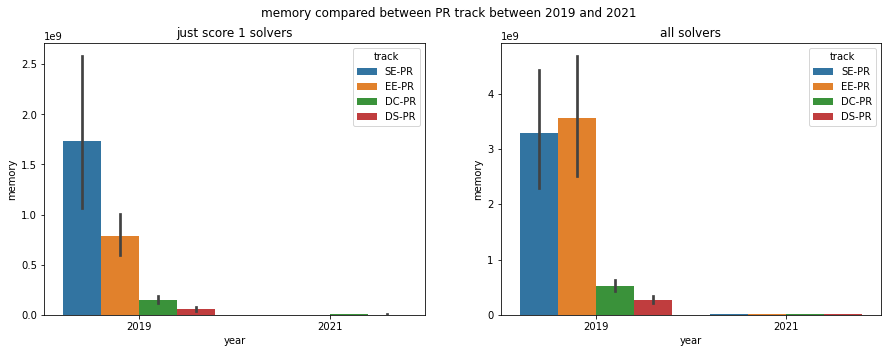

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('memory compared between PR track between 2019 and 2021')

sns.barplot(ax=axes[0], x='year', y='memory', hue='track',data=df_memory_year_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='memory',hue='track', data=df_memory_year_PR)
axes[1].set_title('all solvers')

In [138]:
df_whole_year_PR['year'].unique()

array([2015, 2017, 2019, 2021], dtype=int64)

In [139]:
df_whole_year_PR.head()

,year,solver,track,instances,judgment,cpu-time,status,score,answer,memory
0,2015,04-Cegartix,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.94,completed,1.0,NaN,NaN
1,2015,11-GRIS,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,7.86,completed,1.0,NaN,NaN
2,2015,08-CoQuiAAS,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.03,completed,1.0,NaN,NaN
3,2015,02-ArgSemSAT,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.96,completed,1.0,NaN,NaN
4,2015,06-ZJU-ARG.sh,EE-PR,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,1.98,completed,1.0,NaN,NaN


## EE-CO track

In [140]:
df_whole_EE_CO = df_whole_year_CO.loc[df_whole_year_CO['track'] == 'EE-CO']

In [141]:
df_whole_EE_CO_correct = df_whole_year_CO_correct.loc[df_whole_year_CO_correct['track'] == 'EE-CO']

Text(0.5, 1.0, 'all solvers')

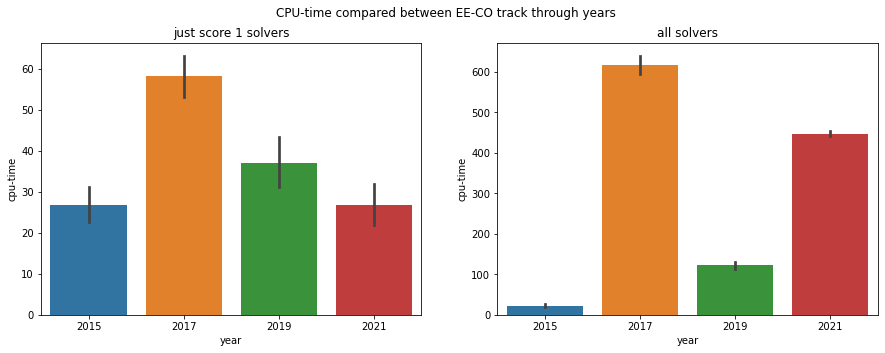

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between EE-CO track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_EE_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_EE_CO)
axes[1].set_title('all solvers')

## SE-CO track

In [143]:
df_whole_SE_CO = df_whole_year_CO.loc[df_whole_year_CO['track'] == 'SE-CO']

In [144]:
df_whole_SE_CO_correct = df_whole_year_CO_correct.loc[df_whole_year_CO_correct['track'] == 'SE-CO']

In [145]:
df_whole_SE_CO.head()

,year,solver,track,instances,judgment,cpu-time,status,score,answer,memory
0,2015,05-Dungell,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed,0,NaN,NaN
1,2015,12-ASGL,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.370,completed,1,NaN,NaN
2,2015,03-ArgTools,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,1.380,completed,1,NaN,NaN
3,2015,16-Carneades,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,incorrect,-0.001,timeout or crashed,0,NaN,NaN
4,2015,08-CoQuiAAS,SE-CO,2015/testset1_gr_small/g_101552__1909__1_1_1__...,correct,0.040,completed,1,NaN,NaN


Text(0.5, 1.0, 'all solvers')

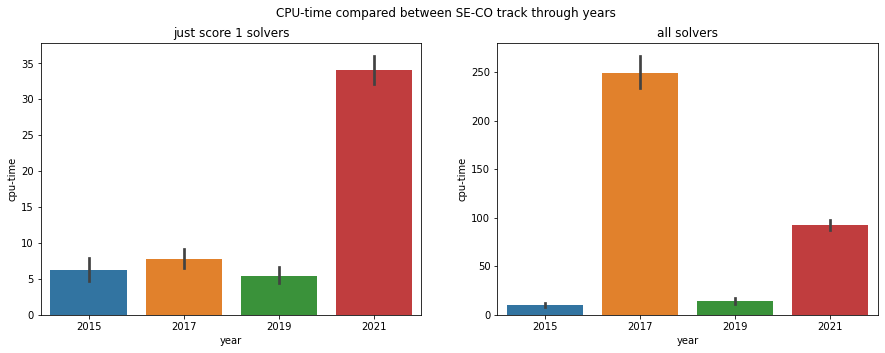

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between SE-CO track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_SE_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_SE_CO)
axes[1].set_title('all solvers')

## DS-CO track

In [147]:
df_whole_DS_CO = df_whole_year_CO.loc[df_whole_year_CO['track'] == 'DS-CO']

In [148]:
df_whole_DS_CO_correct = df_whole_year_CO_correct.loc[df_whole_year_CO_correct['track'] == 'DS-CO']

Text(0.5, 1.0, 'all solvers')

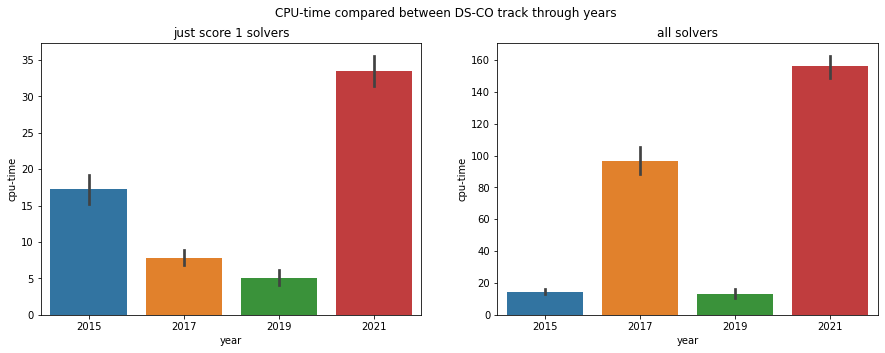

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between DS-CO track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_DS_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_DS_CO)
axes[1].set_title('all solvers')

Unlike the rest of several tracks, in the ds-co track, the average cpu-time in 2021 is greater than in 2017

## DC-CO track

In [150]:
df_whole_DC_CO = df_whole_year_CO.loc[df_whole_year_CO['track'] == 'DC-CO']

In [151]:
df_whole_DC_CO_correct = df_whole_year_CO_correct.loc[df_whole_year_CO_correct['track'] == 'DC-CO']

Text(0.5, 1.0, 'all solvers')

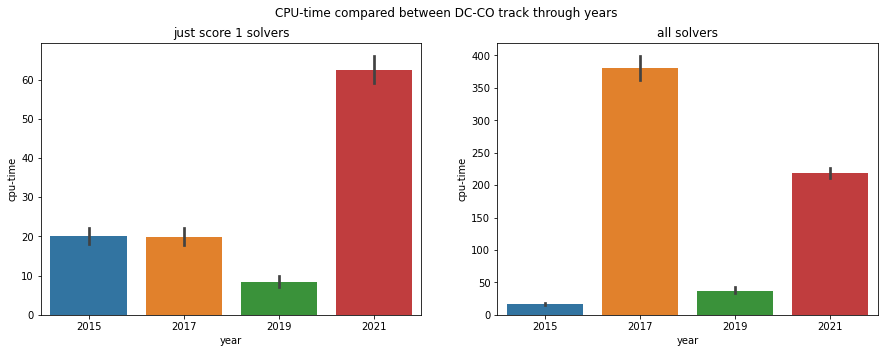

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between DC-CO track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_DC_CO_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_DC_CO)
axes[1].set_title('all solvers')

## EE-PR track

In [153]:
df_whole_EE_PR = df_whole_year_PR.loc[df_whole_year_PR['track'] == 'EE-PR']

In [154]:
df_whole_EE_PR_correct = df_whole_year_PR_correct.loc[df_whole_year_PR_correct['track'] == 'EE-PR']

Text(0.5, 1.0, 'all solvers')

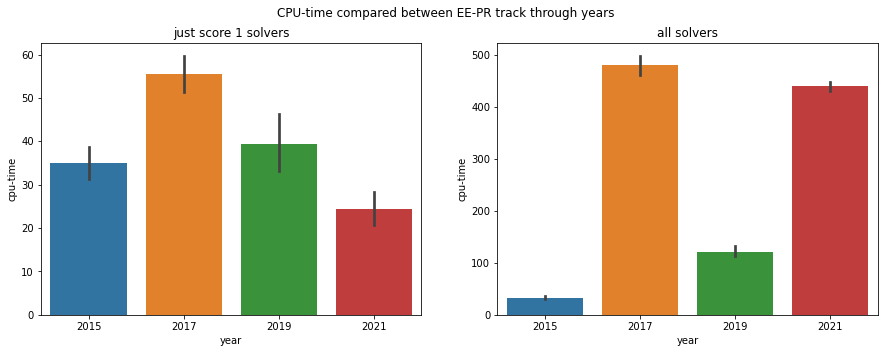

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between EE-PR track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_EE_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_EE_PR)
axes[1].set_title('all solvers')

## SE-PR track

In [156]:
df_whole_SE_PR = df_whole_year_PR.loc[df_whole_year_PR['track'] == 'SE-PR']

In [157]:
df_whole_SE_PR_correct = df_whole_year_PR_correct.loc[df_whole_year_PR_correct['track'] == 'SE-PR']

Text(0.5, 1.0, 'all solvers')

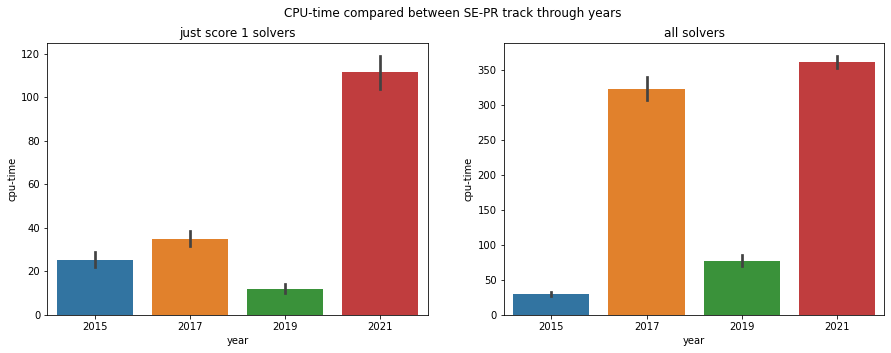

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between SE-PR track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_SE_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_SE_PR)
axes[1].set_title('all solvers')

## DS-PR track

In [159]:
df_whole_DS_PR = df_whole_year_PR.loc[df_whole_year_PR['track'] == 'DS-PR']

In [160]:
df_whole_DS_PR_correct = df_whole_year_PR_correct.loc[df_whole_year_PR_correct['track'] == 'DS-PR']

Text(0.5, 1.0, 'all solvers')

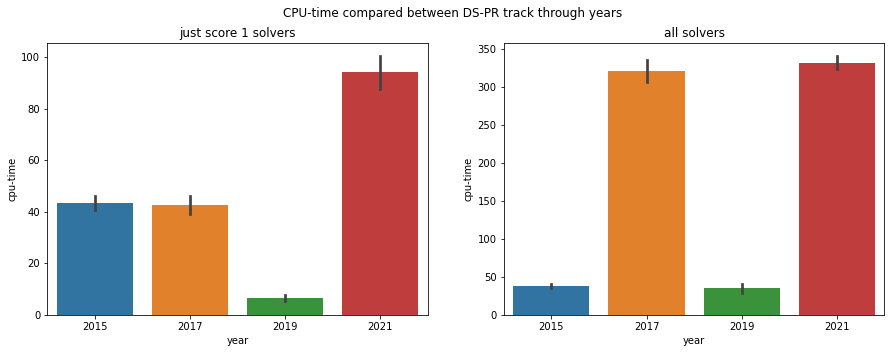

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between DS-PR track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_DS_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_DS_PR)
axes[1].set_title('all solvers')

## DC-PR track

In [162]:
df_whole_DC_PR = df_whole_year_PR.loc[df_whole_year_PR['track'] == 'DC-PR']

In [163]:
df_whole_DC_PR_correct = df_whole_year_PR_correct.loc[df_whole_year_PR_correct['track'] == 'DC-PR']

Text(0.5, 1.0, 'all solvers')

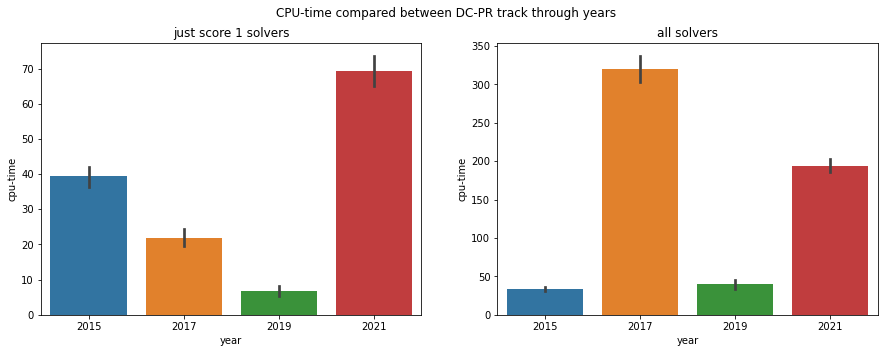

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('CPU-time compared between DC-PR track through years')

sns.barplot(ax=axes[0], x='year', y='cpu-time', data=df_whole_DC_PR_correct)
axes[0].set_title('just score 1 solvers')

sns.barplot(ax=axes[1], x='year', y='cpu-time', data=df_whole_DC_PR)
axes[1].set_title('all solvers')

## The Complexity Classification of Instances

- classification rules:
    - [very easy] Instances completed by all systems in less than 6 seconds solving time. 
    - [easy] Instances completed by all systems in less than 60 seconds solving time. 
    - [medium] Instances completed by all systems in less than 10 minutes solving time. 
    - [hard] Instances completed by at least one system in 20 minutes (twice the timeout) solving time. 
    - [too hard] Instances such that none of the systems finished solving in 20 minutes. 

In [165]:
df_com_merge_PR_c = pd.read_csv('C:/Users/DELL/ICCMA/data/df_com_merge_PR_c.csv')

In [166]:
# def complexity():
df_com_merge_PR_c.head()

,Unnamed: 0,year,solver,track,instances,cpu-time,memory,totargs,totedges,density,totlayers,totsccs,totntsccs,avgntsize,maxsccsize
0,0,2019,aspartix19,SE-PR,2019/instances/A-1-admbuster_1000.tgf,0.491,2904064.0,1000,1498,0.001498,1,1000,0,0.0,1
1,1,2019,coquiaas,SE-PR,2019/instances/A-1-admbuster_1000.tgf,0.322,2883584.0,1000,1498,0.001498,1,1000,0,0.0,1
2,2,2019,eqargsolver,SE-PR,2019/instances/A-1-admbuster_1000.tgf,0.311,2887680.0,1000,1498,0.001498,1,1000,0,0.0,1
3,3,2019,mu-toksia,SE-PR,2019/instances/A-1-admbuster_1000.tgf,0.270,2887680.0,1000,1498,0.001498,1,1000,0,0.0,1
4,4,2019,pyglaf,SE-PR,2019/instances/A-1-admbuster_1000.tgf,0.701,2875392.0,1000,1498,0.001498,1,1000,0,0.0,1
